In [38]:
%matplotlib inline
import yt
import deepdish as dd
import numpy as np
from galaxy_analysis.plot.plot_styles import *
from galaxy_analysis.analysis import Galaxy
import matplotlib.pyplot as plt

import onezone.star as star


from galaxy_analysis.utilities import convert_abundances as ca

In [66]:
# run 1: 1.0E-4 IC metal  --- 1.0E-4 SFR
onez_data1 = np.genfromtxt('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/onezone/onez_model/newrun4/run0000_summary_output.txt',names = True)
# run 2: 1.0E-4 IC metal  --- 4.0E-4 SFR
onez_data2 = np.genfromtxt('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/onezone/onez_model/newrun5/run0000_summary_output.txt',names = True)
# run 3: 4.0E-4 IC metal  --- 1.0E-4 SFR
onez_data3 = np.genfromtxt('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/onezone/onez_model/newrun6/run0000_summary_output.txt',names = True)


def get_abundance(e1,e2, model_data = onez_data1, f1 = 1.0, f2 = 1.0):
    """
    return abundance ratio of two elements over sim time for onez model
    """
    
    A =[\
        ca.abundance_ratio(      (e1,model_data[e1 + '_mass'][i]*1.989E33*f1), 
                                 (e2,model_data[e2 + '_mass'][i]*1.989E33*f2),     
                                 input_type = 'mass')\
      for i in np.arange(np.size(model_data[e2 + '_mass']))\
    ]

    return np.array(A)


In [57]:
onez_data['m_metal']

array([0.0001    , 0.0001    , 0.0001    , 0.0001    , 0.0001    ,
       0.00010015, 0.00010075, 0.00010118, 0.00010163, 0.00010201,
       0.00010267, 0.00010296, 0.00010424, 0.00010479, 0.00010511,
       0.0001056 , 0.0001068 , 0.00010764, 0.00010849, 0.00010904,
       0.00010951, 0.00011024, 0.00011056, 0.00011133, 0.00011221,
       0.000113  , 0.00011315, 0.0001135 , 0.00011448, 0.00011471,
       0.00011533, 0.00011592, 0.00011602, 0.00011636, 0.00011765,
       0.00011811, 0.00011887, 0.00011931, 0.00011971, 0.00012001,
       0.00012039, 0.00012084, 0.00012115, 0.00012129, 0.00012156,
       0.00012204, 0.00012233, 0.00012289, 0.00012304, 0.00012331,
       0.00012345, 0.0001239 , 0.00012428, 0.00012476, 0.00012525,
       0.00012573, 0.0001262 , 0.0001267 , 0.00012691, 0.00012748,
       0.00012769, 0.00012802, 0.00012829, 0.00012879, 0.0001294 ,
       0.00012971, 0.00012995, 0.00013051, 0.00013069, 0.00013143,
       0.00013208, 0.00013247, 0.00013308, 0.00013359, 0.00013

In [40]:
obs_data = np.genfromtxt('datafile6_v2.txt',names=True,skip_header=23,delimiter = ',',
                          dtype='|U3,|U8,|U14,|U14,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8')

In [41]:
obs_data.dtype.names

('dSph',
 'Name',
 'RA',
 'DEC',
 'Teff',
 'e_Teff',
 'logg',
 'vt',
 'FeH',
 'e_FeH',
 'alphaFe',
 'e_alphaFe',
 'BaFe',
 'e_BaFe')

In [42]:
dsname = 'DD0991'

gal  = Galaxy(dsname, wdir = '/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/')
#data = dd.io.load('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/' + dsname + '_galaxy_data.h5')




Parsing Hierarchy : 100%|██████████| 290/290 [00:00<00:00, 21057.20it/s]


In [43]:
dSph   = {'Dra':'Draco', 'UMi' : 'Ursa Minor' , 'Scl' : 'Sculptor', 'For' : 'Fornax'}
colors = {'Dra':'C0', 'UMi' : 'C1', 'Scl' : 'C2', 'For' : 'C3'}

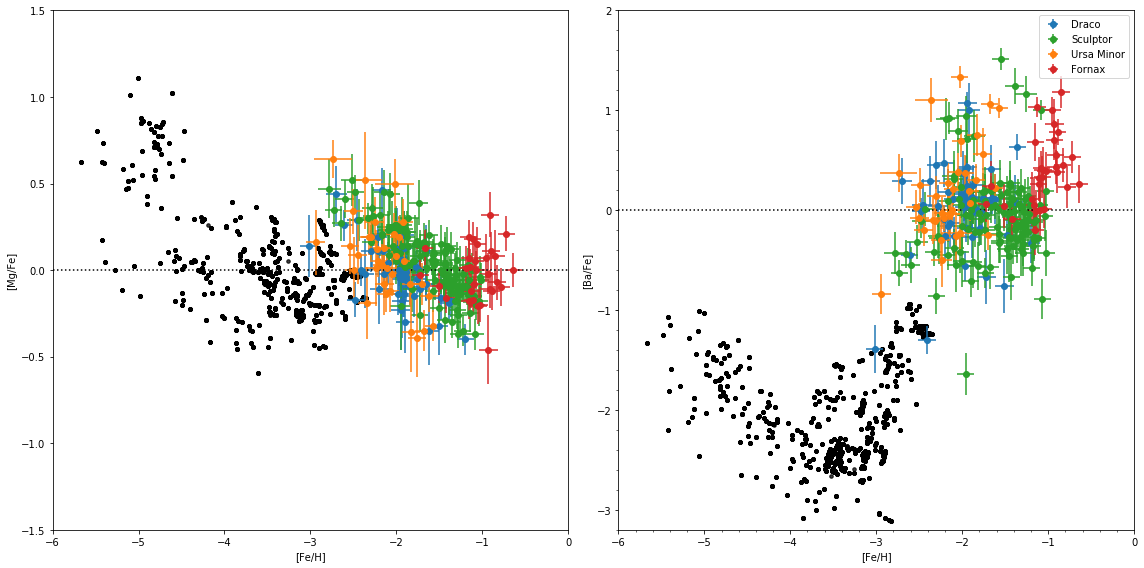

In [44]:
xfield = ('io','particle_Fe_over_H')

y2field = ('io','particle_Ba_over_Fe')
y1field = ('io','particle_Mg_over_Fe')


select = (gal.df['particle_type'] == 11)*\
         (gal.df['creation_time'] > 159 * yt.units.Myr)


fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
x = gal.df[xfield][select]
y = gal.df[y1field][select]
ax[0].scatter(x, y, color = 'black', alpha = 0.5, s = 12)
ax[0].set_xlim(-6,0)
ax[0].set_ylim(-1.5,1.5)
ax[0].plot(ax[0].get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax[0].set_xlabel('[Fe/H]')
ax[0].set_ylabel('[Mg/Fe]')

for k in dSph.keys():
    obs_select = obs_data['dSph'] == k
    
    xobs = obs_data['FeH'][obs_select]
    yobs = obs_data['alphaFe'][obs_select]
    xerrobs = obs_data['e_FeH'][obs_select]
    yerrobs = obs_data['e_alphaFe'][obs_select]

    ax[0].errorbar(xobs,yobs,
                  xerr=xerrobs,yerr=yerrobs, 
                  color = colors[k], fmt = 'o', label = dSph[k])



x = gal.df[xfield][select]
y = gal.df[y2field][select]
ax[1].scatter(x, y, color = 'black', alpha = 0.5, s = 12)
ax[1].set_xlim(-6,0)
ax[1].set_ylim(-3.2,2.0)
ax[1].plot(ax[1].get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax[1].set_xlabel('[Fe/H]')
ax[1].set_ylabel('[Ba/Fe]')



for k in dSph.keys():
    obs_select = obs_data['dSph'] == k
    
    xobs = obs_data['FeH'][obs_select]
    yobs = obs_data['BaFe'][obs_select]
    xerrobs = obs_data['e_FeH'][obs_select]
    yerrobs = obs_data['e_BaFe'][obs_select]

    ax[1].errorbar(xobs,yobs,
                  xerr=xerrobs,yerr=yerrobs, 
                  color = colors[k], fmt = 'o', label = dSph[k])

ax[1].legend(loc = 'best')

plt.tight_layout()
plt.minorticks_on()
fig.savefig('Mg_Ba_stellar_abundances.png')


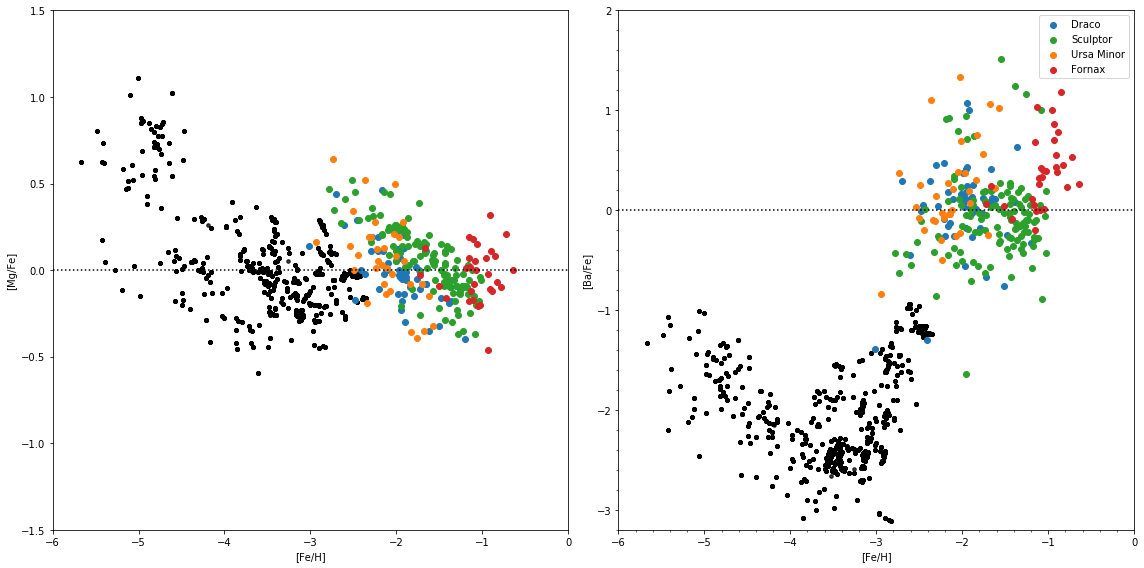

In [45]:
xfield = ('io','particle_Fe_over_H')

y2field = ('io','particle_Ba_over_Fe')
y1field = ('io','particle_Mg_over_Fe')


select = (gal.df['particle_type'] == 11)*\
         (gal.df['creation_time'] > 159 * yt.units.Myr)


fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
x = gal.df[xfield][select]
y = gal.df[y1field][select]
ax[0].scatter(x, y, color = 'black', alpha = 0.5, s = 12)
ax[0].set_xlim(-6,0)
ax[0].set_ylim(-1.5,1.5)
ax[0].plot(ax[0].get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax[0].set_xlabel('[Fe/H]')
ax[0].set_ylabel('[Mg/Fe]')

for k in dSph.keys():
    obs_select = obs_data['dSph'] == k
    
    xobs = obs_data['FeH'][obs_select]
    yobs = obs_data['alphaFe'][obs_select]
    xerrobs = obs_data['e_FeH'][obs_select]
    yerrobs = obs_data['e_alphaFe'][obs_select]

    ax[0].scatter(xobs,yobs,
                  #xerr=xerrobs,yerr=yerrobs, 
                  color = colors[k],  label = dSph[k])



x = gal.df[xfield][select]
y = gal.df[y2field][select]
ax[1].scatter(x, y, color = 'black', alpha = 0.5, s = 12)
ax[1].set_xlim(-6,0)
ax[1].set_ylim(-3.2,2.0)
ax[1].plot(ax[1].get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax[1].set_xlabel('[Fe/H]')
ax[1].set_ylabel('[Ba/Fe]')



for k in dSph.keys():
    obs_select = obs_data['dSph'] == k
    
    xobs = obs_data['FeH'][obs_select]
    yobs = obs_data['BaFe'][obs_select]
    xerrobs = obs_data['e_FeH'][obs_select]
    yerrobs = obs_data['e_BaFe'][obs_select]

    ax[1].scatter(xobs,yobs,
                 # xerr=xerrobs,yerr=yerrobs, 
                  color = colors[k], label = dSph[k])

ax[1].legend(loc = 'best')

plt.tight_layout()
plt.minorticks_on()
fig.savefig('Mg_Ba_stellar_abundances_noerror.png')


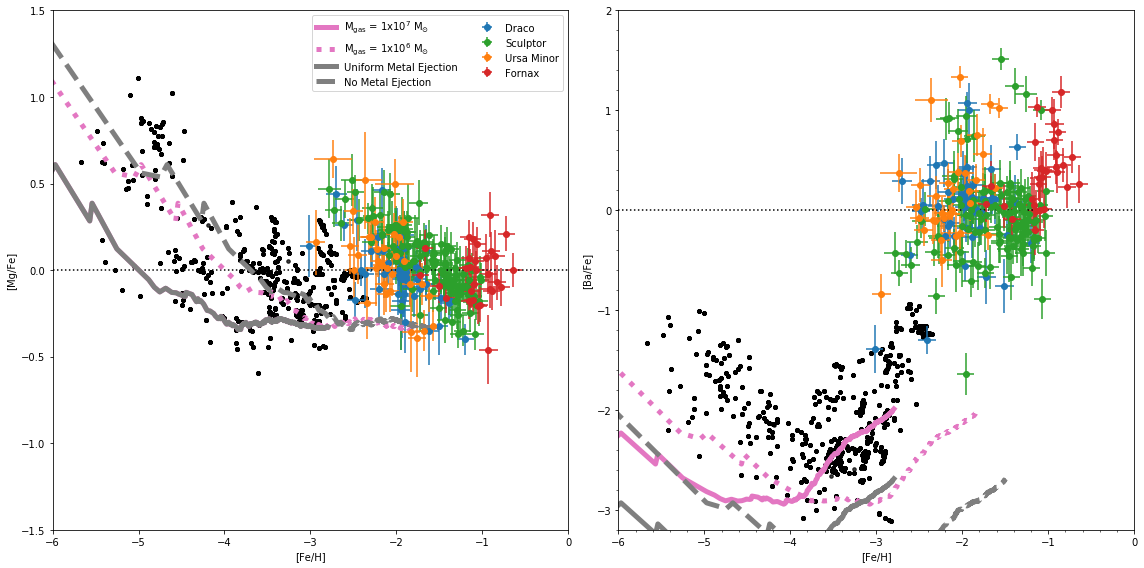

In [65]:
xfield = ('io','particle_Fe_over_H')

y2field = ('io','particle_Ba_over_Fe')
y1field = ('io','particle_Mg_over_Fe')


select = (gal.df['particle_type'] == 11)*\
         (gal.df['creation_time'] > 159 * yt.units.Myr)


fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
x = gal.df[xfield][select]
y = gal.df[y1field][select]
ax[0].scatter(x, y, color = 'black', alpha = 0.5, s = 12)
ax[0].set_xlim(-6,0)
ax[0].set_ylim(-1.5,1.5)
ax[0].plot(ax[0].get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax[0].set_xlabel('[Fe/H]')
ax[0].set_ylabel('[Mg/Fe]')

# plot observational data
for k in dSph.keys():
    obs_select = obs_data['dSph'] == k
    
    xobs = obs_data['FeH'][obs_select]
    yobs = obs_data['alphaFe'][obs_select]
    xerrobs = obs_data['e_FeH'][obs_select]
    yerrobs = obs_data['e_alphaFe'][obs_select]

    ax[0].errorbar(xobs,yobs,
                  xerr=xerrobs,yerr=yerrobs, 
                  color = colors[k], fmt = 'o', label = dSph[k])


# plot onezone simulation data
x = get_abundance('Fe','H', f1 = 0.05, f2 = 1.0)
y = get_abundance('Mg','Fe', f1 = 0.05, f2  = 0.05)
ax[0].plot(x, y, color = 'C6', ls = '-', lw = 5, label = r'M$_{\rm gas}$ = 1x10$^7$ M$_{\odot}$')

x = get_abundance('Fe','H', f1 = 0.05, f2 = 0.1)
y = get_abundance('Mg','Fe', f1 = 0.05, f2  = 0.05)
ax[0].plot(x, y, color = 'C6', ls = ':', lw = 5, label = r'M$_{\rm gas}$ = 1x10$^6$ M$_{\odot}$')

x = get_abundance('Fe','H', f1 = 0.05, f2 = 1.0)
y = get_abundance('Mg','Fe', f1 = 0.05, f2  = 0.05)
ax[0].plot(x, y, color = 'C7', ls = '-', lw = 5, label = r'Uniform Metal Ejection')

x = get_abundance('Fe','H', f1 = 1.0, f2 = 1.0)
y = get_abundance('Mg','Fe', f1 = 1.0, f2  = 1.0)
ax[0].plot(x, y, color = 'C7', ls = '--', lw = 5, label = r'No Metal Ejection')

################################################################################################

x = gal.df[xfield][select]
y = gal.df[y2field][select]
ax[1].scatter(x, y, color = 'black', alpha = 0.5, s = 12)
ax[1].set_xlim(-6,0)
ax[1].set_ylim(-3.2,2.0)
ax[1].plot(ax[1].get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax[1].set_xlabel('[Fe/H]')
ax[1].set_ylabel('[Ba/Fe]')

# plot onezone simulation data
x = get_abundance('Fe','H', f1 = 0.05, f2 = 1.0)
y = get_abundance('Ba','Fe', f1 = 0.25, f2  = 0.05)
ax[1].plot(x, y, color = 'C6', ls = '-', lw = 5, label = r'M$_{\rm gas}$ = 1x10$^7$ M$_{\odot}$')

x = get_abundance('Fe','H', f1 = 0.05, f2 = 0.1)
y = get_abundance('Ba','Fe', f1 = 0.25, f2  = 0.05)
ax[1].plot(x, y, color = 'C6', ls = ':', lw = 5, label = r'M$_{\rm gas}$ = 1x10$^6$ M$_{\odot}$')


x = get_abundance('Fe','H', f1 = 0.05, f2 = 1.0)
y = get_abundance('Ba','Fe', f1 = 0.05, f2  = 0.05)
ax[1].plot(x, y, color = 'C7', ls = '-', lw = 5, label = r'Uniform Metal Ejection')

x = get_abundance('Fe','H', f1 = 1.0, f2 = 1.0)
y = get_abundance('Ba','Fe', f1 = 1.0, f2  = 1.0)
ax[1].plot(x, y, color = 'C7', ls = '--', lw = 5, label = r'No Metal Ejection')

for k in dSph.keys():
    obs_select = obs_data['dSph'] == k
    
    xobs = obs_data['FeH'][obs_select]
    yobs = obs_data['BaFe'][obs_select]
    xerrobs = obs_data['e_FeH'][obs_select]
    yerrobs = obs_data['e_BaFe'][obs_select]

    ax[1].errorbar(xobs,yobs,
                  xerr=xerrobs,yerr=yerrobs, 
                  color = colors[k], fmt = 'o', label = dSph[k])

ax[0].legend(loc = 'best',ncol=2)

plt.tight_layout()
plt.minorticks_on()
fig.savefig('Mg_Ba_stellar_abundances_onezmodel1.png')


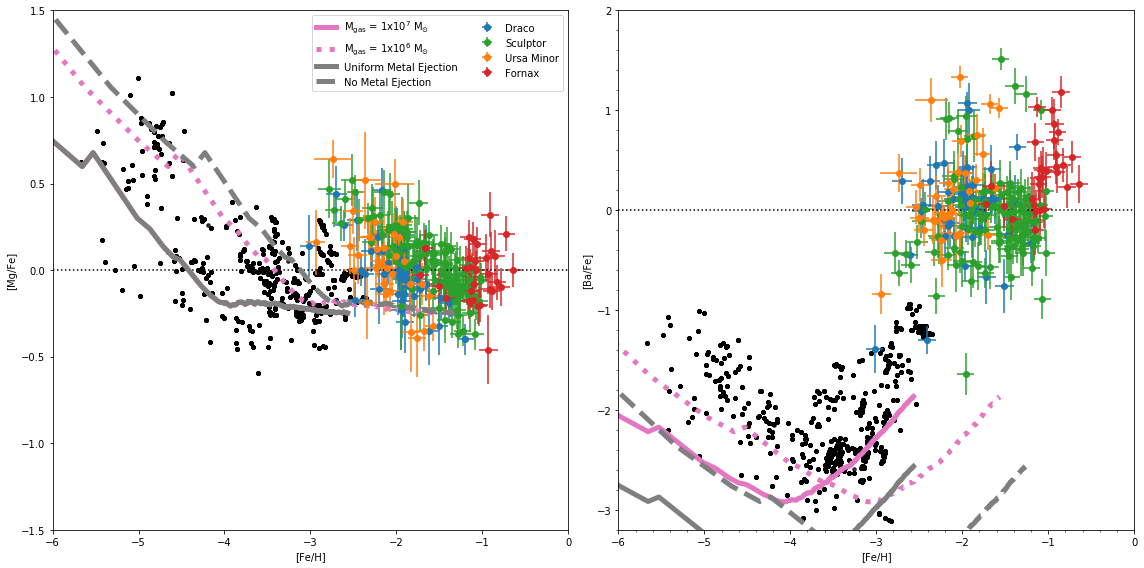

In [67]:
xfield = ('io','particle_Fe_over_H')

y2field = ('io','particle_Ba_over_Fe')
y1field = ('io','particle_Mg_over_Fe')


select = (gal.df['particle_type'] == 11)*\
         (gal.df['creation_time'] > 159 * yt.units.Myr)


fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
x = gal.df[xfield][select]
y = gal.df[y1field][select]
ax[0].scatter(x, y, color = 'black', alpha = 0.5, s = 12)
ax[0].set_xlim(-6,0)
ax[0].set_ylim(-1.5,1.5)
ax[0].plot(ax[0].get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax[0].set_xlabel('[Fe/H]')
ax[0].set_ylabel('[Mg/Fe]')

# plot observational data
for k in dSph.keys():
    obs_select = obs_data['dSph'] == k
    
    xobs = obs_data['FeH'][obs_select]
    yobs = obs_data['alphaFe'][obs_select]
    xerrobs = obs_data['e_FeH'][obs_select]
    yerrobs = obs_data['e_alphaFe'][obs_select]

    ax[0].errorbar(xobs,yobs,
                  xerr=xerrobs,yerr=yerrobs, 
                  color = colors[k], fmt = 'o', label = dSph[k])


# plot onezone simulation data
x = get_abundance('Fe','H', f1 = 0.05, f2 = 1.0, model_data =onez_data2)
y = get_abundance('Mg','Fe', f1 = 0.05, f2  = 0.05, model_data =onez_data2)
ax[0].plot(x, y, color = 'C6', ls = '-', lw = 5, label = r'M$_{\rm gas}$ = 1x10$^7$ M$_{\odot}$')

x = get_abundance('Fe','H', f1 = 0.05, f2 = 0.1, model_data =onez_data2)
y = get_abundance('Mg','Fe', f1 = 0.05, f2  = 0.05, model_data =onez_data2)
ax[0].plot(x, y, color = 'C6', ls = ':', lw = 5, label = r'M$_{\rm gas}$ = 1x10$^6$ M$_{\odot}$')

x = get_abundance('Fe','H', f1 = 0.05, f2 = 1.0, model_data =onez_data2)
y = get_abundance('Mg','Fe', f1 = 0.05, f2  = 0.05, model_data =onez_data2)
ax[0].plot(x, y, color = 'C7', ls = '-', lw = 5, label = r'Uniform Metal Ejection')

x = get_abundance('Fe','H', f1 = 1.0, f2 = 1.0, model_data =onez_data2)
y = get_abundance('Mg','Fe', f1 = 1.0, f2  = 1.0, model_data =onez_data2)
ax[0].plot(x, y, color = 'C7', ls = '--', lw = 5, label = r'No Metal Ejection')

################################################################################################

x = gal.df[xfield][select]
y = gal.df[y2field][select]
ax[1].scatter(x, y, color = 'black', alpha = 0.5, s = 12)
ax[1].set_xlim(-6,0)
ax[1].set_ylim(-3.2,2.0)
ax[1].plot(ax[1].get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax[1].set_xlabel('[Fe/H]')
ax[1].set_ylabel('[Ba/Fe]')

# plot onezone simulation data
x = get_abundance('Fe','H', f1 = 0.05, f2 = 1.0, model_data =onez_data2)
y = get_abundance('Ba','Fe', f1 = 0.25, f2  = 0.05, model_data =onez_data2)
ax[1].plot(x, y, color = 'C6', ls = '-', lw = 5, label = r'M$_{\rm gas}$ = 1x10$^7$ M$_{\odot}$')

x = get_abundance('Fe','H', f1 = 0.05, f2 = 0.1, model_data =onez_data2)
y = get_abundance('Ba','Fe', f1 = 0.25, f2  = 0.05, model_data =onez_data2)
ax[1].plot(x, y, color = 'C6', ls = ':', lw = 5, label = r'M$_{\rm gas}$ = 1x10$^6$ M$_{\odot}$')


x = get_abundance('Fe','H', f1 = 0.05, f2 = 1.0, model_data =onez_data2)
y = get_abundance('Ba','Fe', f1 = 0.05, f2  = 0.05, model_data =onez_data2)
ax[1].plot(x, y, color = 'C7', ls = '-', lw = 5, label = r'Uniform Metal Ejection')

x = get_abundance('Fe','H', f1 = 1.0, f2 = 1.0, model_data =onez_data2)
y = get_abundance('Ba','Fe', f1 = 1.0, f2  = 1.0, model_data =onez_data2)
ax[1].plot(x, y, color = 'C7', ls = '--', lw = 5, label = r'No Metal Ejection')

for k in dSph.keys():
    obs_select = obs_data['dSph'] == k
    
    xobs = obs_data['FeH'][obs_select]
    yobs = obs_data['BaFe'][obs_select]
    xerrobs = obs_data['e_FeH'][obs_select]
    yerrobs = obs_data['e_BaFe'][obs_select]

    ax[1].errorbar(xobs,yobs,
                  xerr=xerrobs,yerr=yerrobs, 
                  color = colors[k], fmt = 'o', label = dSph[k])

ax[0].legend(loc = 'best',ncol=2)

plt.tight_layout()
plt.minorticks_on()
fig.savefig('Mg_Ba_stellar_abundances_onezmodel2.png')


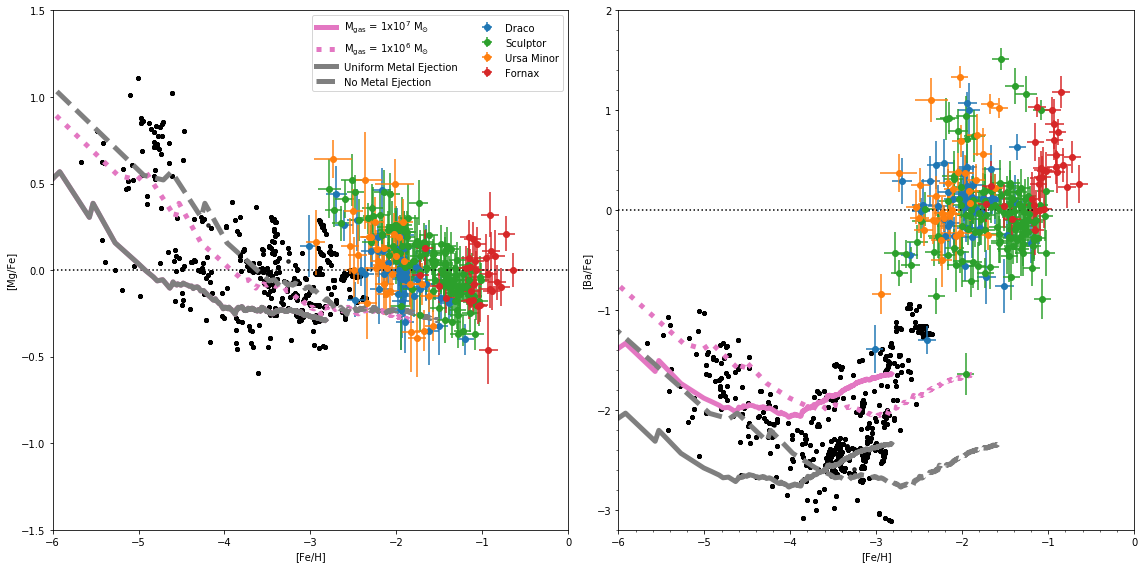

In [64]:
xfield = ('io','particle_Fe_over_H')

y2field = ('io','particle_Ba_over_Fe')
y1field = ('io','particle_Mg_over_Fe')


select = (gal.df['particle_type'] == 11)*\
         (gal.df['creation_time'] > 159 * yt.units.Myr)


fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
x = gal.df[xfield][select]
y = gal.df[y1field][select]
ax[0].scatter(x, y, color = 'black', alpha = 0.5, s = 12)
ax[0].set_xlim(-6,0)
ax[0].set_ylim(-1.5,1.5)
ax[0].plot(ax[0].get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax[0].set_xlabel('[Fe/H]')
ax[0].set_ylabel('[Mg/Fe]')

# plot observational data
for k in dSph.keys():
    obs_select = obs_data['dSph'] == k
    
    xobs = obs_data['FeH'][obs_select]
    yobs = obs_data['alphaFe'][obs_select]
    xerrobs = obs_data['e_FeH'][obs_select]
    yerrobs = obs_data['e_alphaFe'][obs_select]

    ax[0].errorbar(xobs,yobs,
                  xerr=xerrobs,yerr=yerrobs, 
                  color = colors[k], fmt = 'o', label = dSph[k])


# plot onezone simulation data
x = get_abundance('Fe','H', f1 = 0.05, f2 = 1.0, model_data = onez_data3)
y = get_abundance('Mg','Fe', f1 = 0.05, f2  = 0.05, model_data = onez_data3)
ax[0].plot(x, y, color = 'C6', ls = '-', lw = 5, label = r'M$_{\rm gas}$ = 1x10$^7$ M$_{\odot}$')

x = get_abundance('Fe','H', f1 = 0.05, f2 = 0.1, model_data = onez_data3)
y = get_abundance('Mg','Fe', f1 = 0.05, f2  = 0.05, model_data = onez_data3)
ax[0].plot(x, y, color = 'C6', ls = ':', lw = 5, label = r'M$_{\rm gas}$ = 1x10$^6$ M$_{\odot}$')

x = get_abundance('Fe','H', f1 = 0.05, f2 = 1.0, model_data = onez_data3)
y = get_abundance('Mg','Fe', f1 = 0.05, f2  = 0.05, model_data = onez_data3)
ax[0].plot(x, y, color = 'C7', ls = '-', lw = 5, label = r'Uniform Metal Ejection')

x = get_abundance('Fe','H', f1 = 1.0, f2 = 1.0, model_data = onez_data3)
y = get_abundance('Mg','Fe', f1 = 1.0, f2  = 1.0, model_data = onez_data3)
ax[0].plot(x, y, color = 'C7', ls = '--', lw = 5, label = r'No Metal Ejection')

################################################################################################

x = gal.df[xfield][select]
y = gal.df[y2field][select]
ax[1].scatter(x, y, color = 'black', alpha = 0.5, s = 12)
ax[1].set_xlim(-6,0)
ax[1].set_ylim(-3.2,2.0)
ax[1].plot(ax[1].get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax[1].set_xlabel('[Fe/H]')
ax[1].set_ylabel('[Ba/Fe]')

# plot onezone simulation data
x = get_abundance('Fe','H', f1 = 0.05, f2 = 1.0, model_data = onez_data3)
y = get_abundance('Ba','Fe', f1 = 0.25, f2  = 0.05, model_data = onez_data3)
ax[1].plot(x, y, color = 'C6', ls = '-', lw = 5, label = r'M$_{\rm gas}$ = 1x10$^7$ M$_{\odot}$')

x = get_abundance('Fe','H', f1 = 0.05, f2 = 0.1, model_data = onez_data3)
y = get_abundance('Ba','Fe', f1 = 0.25, f2  = 0.05, model_data = onez_data3)
ax[1].plot(x, y, color = 'C6', ls = ':', lw = 5, label = r'M$_{\rm gas}$ = 1x10$^6$ M$_{\odot}$')


x = get_abundance('Fe','H', f1 = 0.05, f2 = 1.0, model_data = onez_data3)
y = get_abundance('Ba','Fe', f1 = 0.05, f2  = 0.05, model_data = onez_data3)
ax[1].plot(x, y, color = 'C7', ls = '-', lw = 5, label = r'Uniform Metal Ejection')

x = get_abundance('Fe','H', f1 = 1.0, f2 = 1.0, model_data = onez_data3)
y = get_abundance('Ba','Fe', f1 = 1.0, f2  = 1.0, model_data = onez_data3)
ax[1].plot(x, y, color = 'C7', ls = '--', lw = 5, label = r'No Metal Ejection')

for k in dSph.keys():
    obs_select = obs_data['dSph'] == k
    
    xobs = obs_data['FeH'][obs_select]
    yobs = obs_data['BaFe'][obs_select]
    xerrobs = obs_data['e_FeH'][obs_select]
    yerrobs = obs_data['e_BaFe'][obs_select]

    ax[1].errorbar(xobs,yobs,
                  xerr=xerrobs,yerr=yerrobs, 
                  color = colors[k], fmt = 'o', label = dSph[k])

ax[0].legend(loc = 'best',ncol=2)

plt.tight_layout()
plt.minorticks_on()
fig.savefig('Mg_Ba_stellar_abundances_onezmodel3.png')


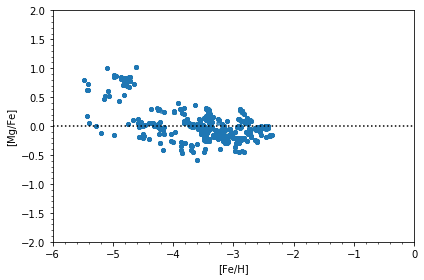

In [48]:
xfield = ('io','particle_Fe_over_H')
yfield = ('io','particle_Mg_over_Fe')

select = (gal.df['particle_type'] == 11)*\
         (gal.df[('io','particle_Mg_over_H')] > -8) *\
         (gal.df[('io','particle_Fe_over_H')] > -10) *\
         (gal.df['creation_time'] > 169 * yt.units.Myr)

x = gal.df[xfield][select]
y = gal.df[yfield][select]

fig, ax = plt.subplots()

ax.scatter(x, y, color = 'C0', alpha = 0.5, s = 12)
ax.set_xlim(-6,0)
ax.set_ylim(-2,2)
ax.plot(ax.get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[Mg/Fe]')
plt.tight_layout()
plt.minorticks_on()


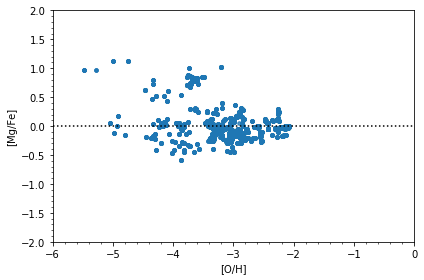

In [49]:
xfield = ('io','particle_O_over_H')
yfield = ('io','particle_Mg_over_Fe')

select = (gal.df['particle_type'] == 11)*\
         (gal.df[('io','particle_O_over_H')] > -8) *\
         (gal.df[('io','particle_Fe_over_H')] > -10) *\
         (gal.df['creation_time'] > 169 * yt.units.Myr)

x = gal.df[xfield][select]
y = gal.df[yfield][select]

fig, ax = plt.subplots()

ax.scatter(x, y, color = 'C0', alpha = 0.5, s = 12)
ax.set_xlim(-6,0)
ax.set_ylim(-2,2)
ax.plot(ax.get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax.set_xlabel('[O/H]')
ax.set_ylabel('[Mg/Fe]')
plt.tight_layout()
plt.minorticks_on()


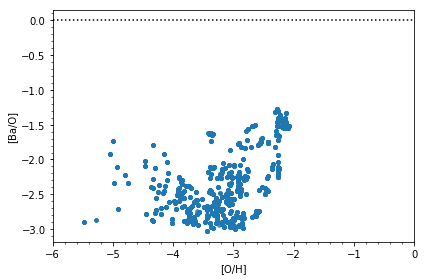

In [50]:
xfield = ('io','particle_O_over_H')
yfield = ('io','particle_Ba_over_O')

select = (gal.df['particle_type'] == 11)*\
         (gal.df[('io','particle_O_over_H')] > -8) *\
         (gal.df[('io','particle_Ba_over_H')] > -10) *\
         (gal.df['creation_time'] > 169 * yt.units.Myr)

x = gal.df[xfield][select]
y = gal.df[yfield][select]

fig, ax = plt.subplots()

ax.scatter(x, y, color = 'C0', alpha = 0.5, s = 12)
ax.set_xlim(-6,0)
#ax.set_ylim(-2,2)
ax.plot(ax.get_xlim(),[0.0,0.0], lw = 1.5, ls = ':', color = 'black')
ax.set_xlabel('[O/H]')
ax.set_ylabel('[Ba/O]')
plt.tight_layout()
plt.minorticks_on()


(array([1.93940948e+37, 2.37457342e+37, 6.10815112e+37, 7.64531610e+37,
        1.32193822e+38, 9.28416639e+37, 2.36950254e+37, 4.71154048e+36,
        7.26062087e+36, 1.83292626e+36]),
 YTArray([-3.22971845, -3.10090207, -2.97208569, -2.84326931, -2.71445292,
          -2.58563654, -2.45682016, -2.32800378, -2.1991874 , -2.07037101,
          -1.94155463]) (dimensionless),
 <a list of 10 Patch objects>)

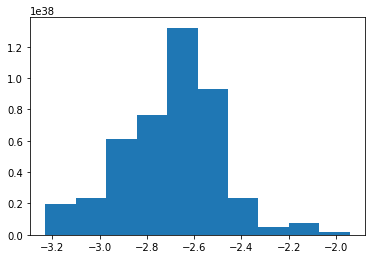

In [51]:
plt.hist(gal.df['Fe_over_H'][gal.df['number_density'] > 25.0], weights = gal.df['cell_mass'][gal.df['number_density'] > 25.0])

In [52]:
plt.hist?

In [53]:
s = star.Star(M = 4.0, Z = 4.0E-4, abundances = {'m_tot': 1.0, 'Ba' : 0.0, 'O':0.0,'Fe':0.0})
s.wind_ejecta_masses()

OrderedDict([('m_tot', 3.099410989720843),
             ('Ba', 2.147598506666667e-09),
             ('O', 0.004813359410666667),
             ('Fe', 1.7779746666666667e-05)])

In [54]:
star.StarParticle?